In [275]:
from iexfinance.stocks import Stock
from iexfinance.stocks import get_collections
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import requests
import requests_cache
import matplotlib.dates as dates
from pprint import pprint
my_token="sk_2afcc445474847eb89769bca333e012f"
expiry = datetime.timedelta(days=90)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expiry)

In [290]:
def get_stock_df(ticker):
    stock = Stock(ticker, output_format='pandas', token=my_token, session=session)
    balance_sheet = stock.get_balance_sheet(last=4,period="annual")
    balance_sheet['bookValue'] = balance_sheet['totalAssets'] - balance_sheet['totalLiabilities']
    balance_sheet = balance_sheet[['totalAssets','totalLiabilities','longTermDebt', 'bookValue']].iloc[::-1]
    #print(balance_sheet)
    return balance_sheet

In [293]:
def plot_stock(df, ticker):
    plt.rcParams['figure.dpi'] = 100
    fig, axes = plt.subplots(2,3, sharey=True, figsize=(15,6))
    fig.suptitle(ticker)
    
    # Balance Sheet
    plot1 = axes[0][0]
    plot1.set_title('Balance Sheet')
    plot1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    for key in df.keys():
        df[key].plot(label=key, ax=plot1, title=key)
    plot1.legend(loc="upper center")
    
    plt.tight_layout(h_pad=1, w_pad=0)

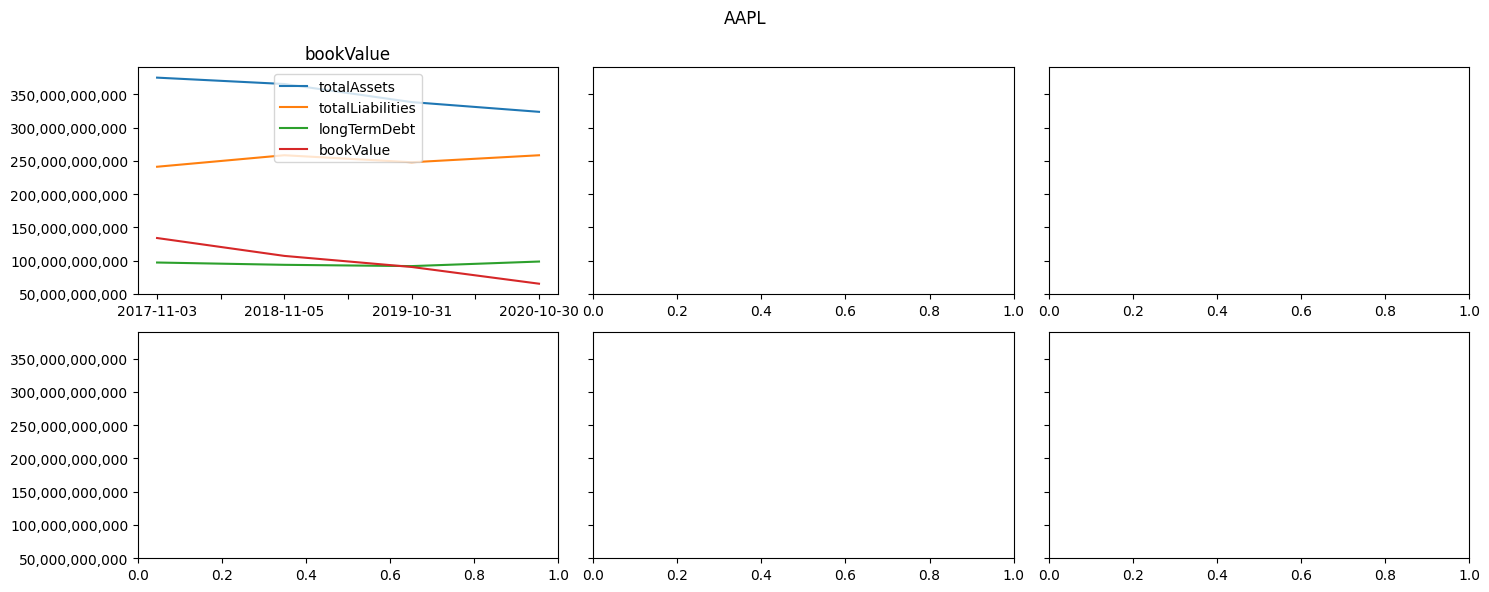

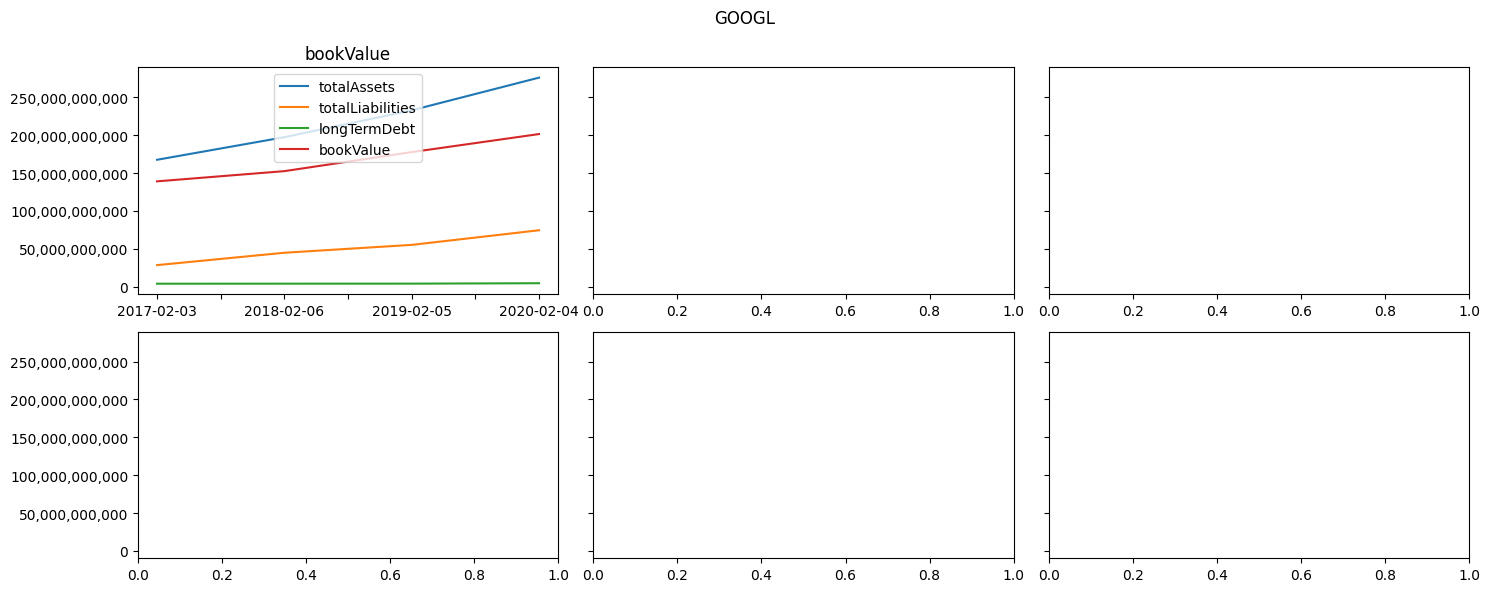

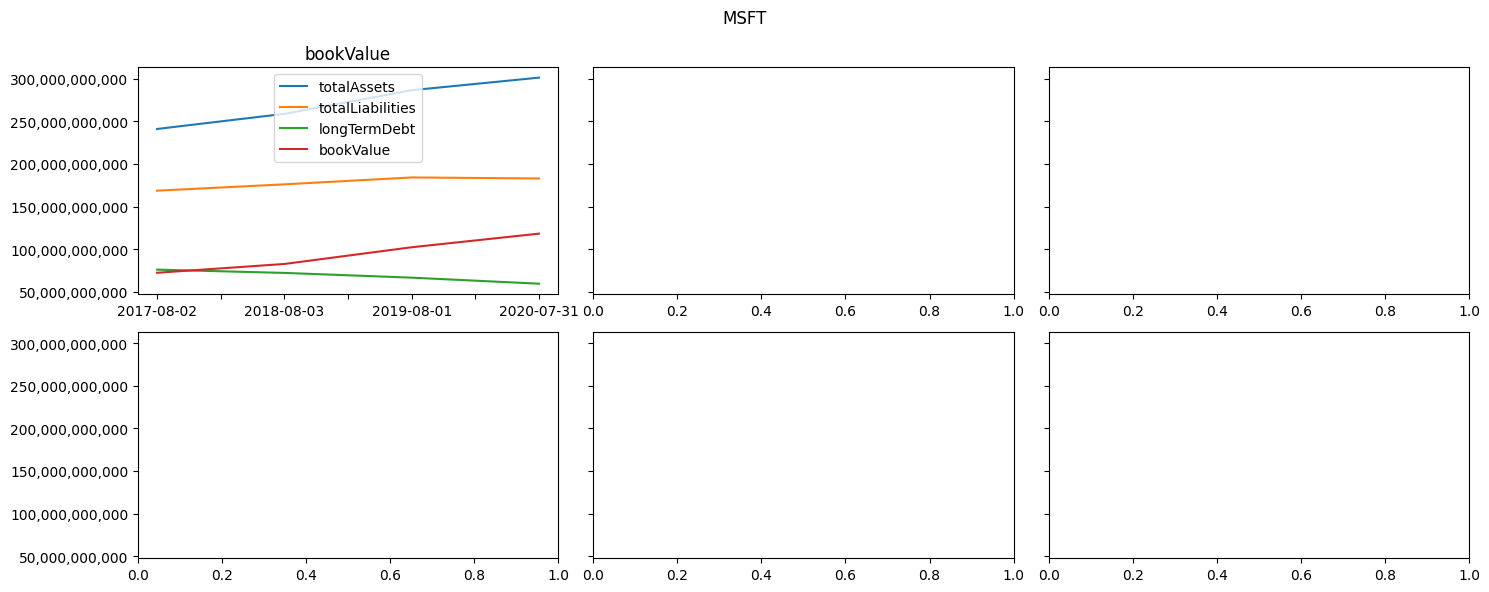

In [294]:
tickers = ['AAPL','GOOGL', 'MSFT']

for ticker in tickers:
    df = get_stock_df(ticker)
    plot_stock(df, ticker)


In [148]:
symbols = get_symbols(token=my_token, session=session)
y = symbols.groupby(["type"]).sum()
#x = symbols[symbols.type == "cs"]
#x = symbols.loc[(symbols["type"]=="cs")]
y

,isEnabled
type,
ad,439
cs,5288
et,2337
ps,748
struct,121
wt,411
